In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['Exited'].value_counts()
# Looks like Exited column contains some imbalance dataset. 

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Converting the categorical columns into numericals. 
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_test_scaled 

(array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
         -0.57273139,  0.91509065],
        [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
         -0.57273139, -1.09278791],
        [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
         -0.57273139, -1.09278791],
        ...,
        [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
         -0.57273139, -1.09278791],
        [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
         -0.57273139, -1.09278791],
        [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
         -0.57273139,  0.91509065]]),
 array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
         -0.57273139,  0.91509065],
        [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
         -0.57273139,  0.91509065],
        [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
         -0.57273139, -1.09278791],
        ...,
        [-0.86182692, -0.46686456,  1.72403288, ..., -

In [22]:
!pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [23]:
import tensorflow

In [24]:
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(3, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278 (1.09 KB)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186 (748.00 B)

In [33]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [34]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7898 - loss: 0.4431 - val_accuracy: 0.7975 - val_loss: 0.4343
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4391 - val_accuracy: 0.7975 - val_loss: 0.4325
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4267 - val_accuracy: 0.7975 - val_loss: 0.4309
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7949 - loss: 0.4300 - val_accuracy: 0.8044 - val_loss: 0.4301
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8153 - loss: 0.4218 - val_accuracy: 0.8044 - val_loss: 0.4292
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8062 - loss: 0.4274 - val_accuracy: 0.8056 - val_loss: 0.4282
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.4257 - val_accuracy: 0.8062 - val_loss: 0.4274
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8230 - loss: 0.4199 - val_accuracy: 0.

In [35]:
model.layers[0].get_weights()

[array([[-4.6911661e-02,  1.0784681e-01,  5.8189318e-02],
        [-9.7068840e-01, -1.1765065e+00,  3.1569265e-02],
        [-2.8886015e-02,  4.5033328e-02, -7.2554979e-03],
        [-6.9676876e-01,  2.2443090e-02,  3.3632733e-02],
        [ 1.8661070e-01, -1.5798111e-02, -5.9954459e-03],
        [ 1.4226982e-01, -8.2425226e-04,  8.2554415e-02],
        [-3.6821568e-01,  2.1524888e-01,  9.5367831e-01],
        [-1.0535948e-01,  1.3130172e-01, -2.8416923e-01],
        [ 5.2838825e-02, -1.7748974e-01, -4.7010428e-01],
        [-1.5622438e-01, -4.9212042e-02,  1.2561704e-01],
        [ 2.7587676e-01, -1.3631964e-01,  8.6548072e-01]], dtype=float32),
 array([0.262284 , 0.899642 , 0.5519129], dtype=float32)]

In [36]:
model.layers[1].get_weights()

[array([[-0.5579073 , -0.04986399, -0.3162458 ,  0.58435124, -0.40421888,
         -0.38227612, -0.21669057, -0.4567869 , -0.36722854,  0.72030485,
          0.01616288],
        [ 0.06690836, -1.0478915 ,  0.53803784,  0.6344246 , -0.4248396 ,
          0.25443575, -0.24253052,  0.4895474 , -0.11951955, -0.3543052 ,
          0.354868  ],
        [ 0.05512733, -0.04310843, -0.292611  ,  0.34959185, -0.1529342 ,
          0.30943853, -0.09036392, -0.15335608, -0.793527  ,  0.52650124,
          0.32611114]], dtype=float32),
 array([4.1660079e-04, 4.8553318e-01, 6.8757571e-02, 1.3923711e-01,
        0.0000000e+00, 1.0497907e-01, 0.0000000e+00, 1.0494215e-01,
        3.9009342e-01, 8.6267568e-02, 1.4662264e-01], dtype=float32)]

In [38]:
# making predictions. 
y_log = model.predict(X_test_scaled) # It will gives the probability values ranges from 0 or 1. 

import numpy as np
y_pred = np.where(y_log > 0.1, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [40]:
import matplotlib.pyplot as plt

In [41]:
history.history

{'accuracy': [0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.8023437261581421,
  0.8134375214576721,
  0.8162500262260437,
  0.819531261920929,
  0.8207812309265137,
  0.8246874809265137,
  0.8296874761581421],
 'loss': [0.4330828785896301,
  0.43075448274612427,
  0.42804381251335144,
  0.42582371830940247,
  0.4237455725669861,
  0.42191269993782043,
  0.42040500044822693,
  0.4186045527458191,
  0.4163135886192322,
  0.41332826018333435],
 'val_accuracy': [0.7975000143051147,
  0.7975000143051147,
  0.7975000143051147,
  0.8043749928474426,
  0.8043749928474426,
  0.8056250214576721,
  0.8062499761581421,
  0.8131250143051147,
  0.8149999976158142,
  0.8231250047683716],
 'val_loss': [0.4342604875564575,
  0.43246132135391235,
  0.4309013783931732,
  0.43010205030441284,
  0.42923012375831604,
  0.42823782563209534,
  0.42740172147750854,
  0.4260886311531067,
  0.4234733581542969,
  0.42092034220695496]}

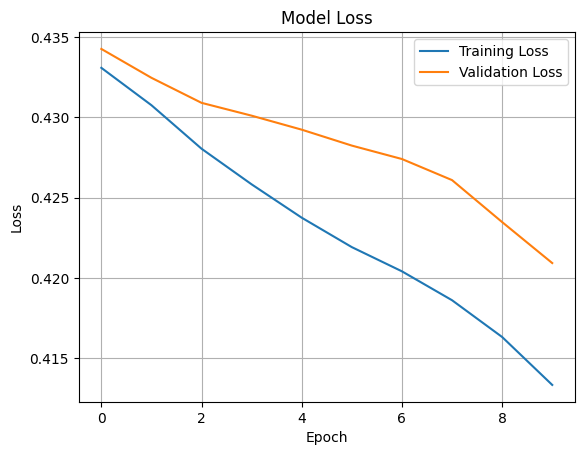

In [44]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss if available
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()


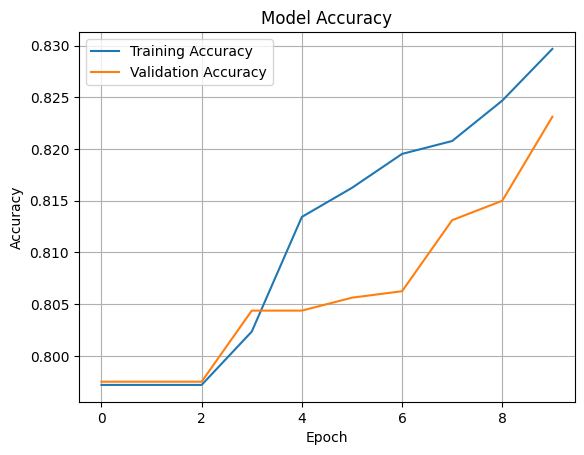

In [45]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot validation accuracy (if available)
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()
